In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_parquet("modelHistoryAggregate.pq")
# print(df.columns)
df

,EncoderActivation,EncoderLossWeighting,TargetClasses,LatentDimension,Epochs,TotalLoss,DecoderLoss,EncoderLoss,TotalValidationLoss,DecoderValidationLoss,EncoderValidationLoss
0,sigmoid,0.000,"[0, 1]",16,10,0.011452,0.011452,0.374905,0.011314,0.011314,0.375644
1,sigmoid,0.002,"[0, 1]",16,10,0.012899,0.012455,0.222410,0.012686,0.012236,0.224988
2,sigmoid,0.004,"[0, 1]",16,10,0.013728,0.013135,0.148383,0.013352,0.012758,0.148357
3,sigmoid,0.006,"[0, 1]",16,10,0.015528,0.014853,0.112542,0.015232,0.014554,0.112878
4,sigmoid,0.008,"[0, 1]",16,10,0.015522,0.014662,0.107587,0.015014,0.014156,0.107325
...,...,...,...,...,...,...,...,...,...,...,...
2926,sigmoid,0.006,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]",16,10,0.024991,0.024005,0.164180,0.024433,0.023445,0.164722
2927,sigmoid,0.008,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]",16,10,0.023912,0.022569,0.167893,0.023572,0.022222,0.168765
2928,sigmoid,0.010,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]",16,10,0.029066,0.027999,0.106747,0.029266,0.028210,0.105597
2929,sigmoid,0.012,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]",16,10,0.030166,0.029211,0.079593,0.030141,0.029188,0.079351


In [4]:
df = df.groupby(["EncoderActivation", "TargetClasses", "Epochs", "EncoderLossWeighting", "LatentDimension"]) \
    .aggregate(["mean", "sem"]) \
    .reset_index()
df

EncoderActivation                   TargetClasses Epochs  \
                                                               
0             sigmoid  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]     10   
1             sigmoid  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]     10   
2             sigmoid  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]     10   
3             sigmoid  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]     10   
4             sigmoid  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]     10   
..                ...                             ...    ...   
229              tanh                          [0, 1]     10   
230              tanh                          [0, 1]     10   
231              tanh                          [0, 1]     10   
232              tanh                          [0, 1]     10   
233              tanh                          [0, 1]     10   

    EncoderLossWeighting LatentDimension TotalLoss           DecoderLoss  \
                                              mean       sem        mean   
0                  0.000              16  0.017414  0.000052    0.017414   
1                  0.000              64  0.013025  0.000037    0.013025   
2                  0.000             128  0.012947  0.000167    0.012947   
3                  0.002              16  0.018644  0.000127    0.017855   
4                  0.002              64  0.014091  0.000124    0.013457   
..                   ...             ...       ...       ...         ...   
229                0.048              64  0.039492  0.003820    0.038723   
230                0.048             128  0.022391  0.000552    0.021344   
231                0.050              16  0.059432  0.002163    0.059297   
232                0.050              64  0.034568  0.003649    0.033438   
233                0.050             128  0.024118  0.002113    0.023069   

              EncoderLoss           TotalValidationLoss            \
          sem        mean       sem                mean       sem   
0    0.000052    0.450663  0.000604            0.017050  0.000057   
1    0.000037    0.445991  0.002296            0.012671  0.000069   
2    0.000167    0.411013  0.003050            0.012572  0.000147   
3    0.000135    0.394682  0.005423            0.018329  0.000110   
4    0.000126    0.316856  0.004616            0.013728  0.000114   
..        ...         ...       ...                 ...       ...   
229  0.003952    0.016017  0.002966            0.039456  0.003810   
230  0.000592    0.021812  0.000870            0.022135  0.000574   
231  0.002237    0.002695  0.001486            0.059314  0.002161   
232  0.003802    0.022602  0.003242            0.034249  0.003676   
233  0.002174    0.020982  0.001293            0.023814  0.002118   

    DecoderValidationLoss           EncoderValidationLoss            
                     mean       sem                  mean       sem  
0                0.017050  0.000057              0.451286  0.000481  
1                0.012671  0.000069              0.446756  0.002232  
2                0.012572  0.000147              0.410848  0.002917  
3                0.017540  0.000116              0.394533  0.005330  
4                0.013096  0.000116              0.315920  0.004787  
..                    ...       ...                   ...       ...  
229              0.038672  0.003945              0.016342  0.003019  
230              0.021090  0.000612              0.021761  0.000829  
231              0.059164  0.002242              0.002999  0.001694  
232              0.033112  0.003829              0.022750  0.003263  
233              0.022757  0.002178              0.021143  0.001258  

[234 rows x 17 columns]

In [5]:
LATENT_DIMENSIONS_VALS = df["LatentDimension"].unique()
LATENT_DIMENSIONS_VALS.sort()

ENCODER_LOSS_WEIGHTINGS_VALS = df["EncoderLossWeighting"].unique()
ENCODER_LOSS_WEIGHTINGS_VALS.sort()

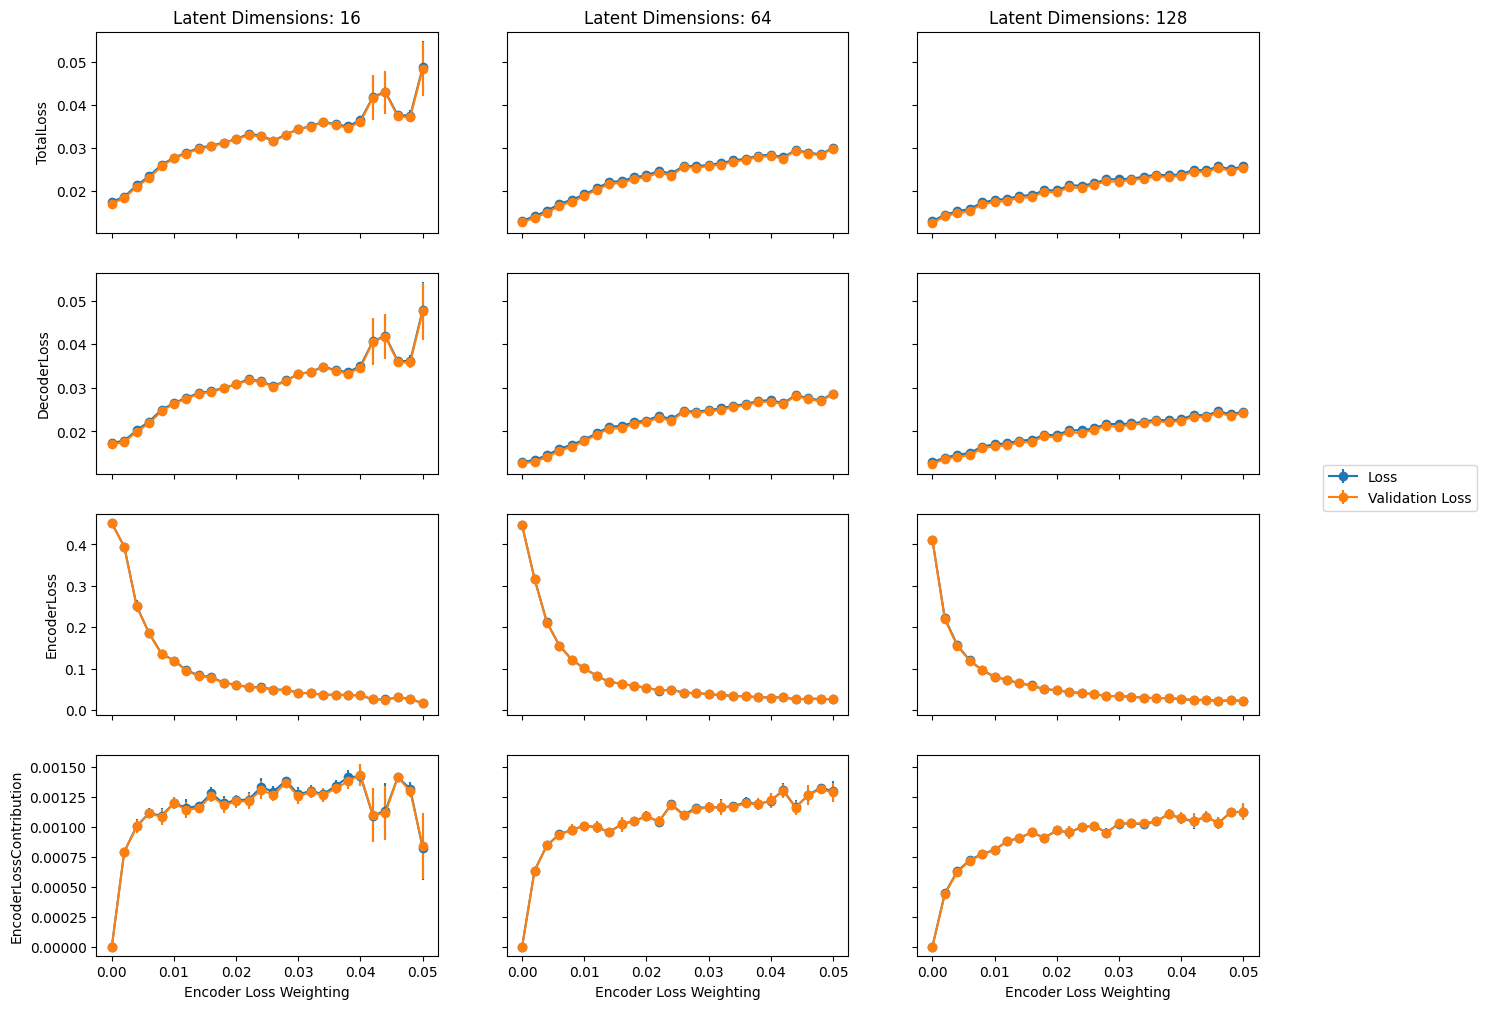

In [8]:
fig, axes = plt.subplots(nrows=4, ncols=len(LATENT_DIMENSIONS_VALS), figsize=(15,12), sharex=True, sharey="row")
# basedf = df[(df["EncoderActivation"]=="tanh") & (df["TargetClasses"]=="[0, 1]")]
basedf = df[(df["EncoderActivation"]=="sigmoid") & (df["TargetClasses"]=="[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]")]

for latentDim, ax in zip(LATENT_DIMENSIONS_VALS, np.ravel(axes[0,:])):
    targetdf = basedf[basedf["LatentDimension"]==latentDim]

    targetcol = basedf[basedf["LatentDimension"]==latentDim]["TotalLoss"]
    ax.errorbar(targetdf["EncoderLossWeighting"], targetcol["mean"], targetcol["sem"], fmt="o-", label="Loss")
    targetcol = basedf[basedf["LatentDimension"]==latentDim]["TotalValidationLoss"]
    ax.errorbar(targetdf["EncoderLossWeighting"], targetcol["mean"], targetcol["sem"], fmt="o-", label="Validation Loss")

for latentDim, ax in zip(LATENT_DIMENSIONS_VALS, np.ravel(axes[1,:])):
    targetcol = basedf[basedf["LatentDimension"]==latentDim]["DecoderLoss"]
    ax.errorbar(targetdf["EncoderLossWeighting"], targetcol["mean"], targetcol["sem"], fmt="o-",)
    targetcol = basedf[basedf["LatentDimension"]==latentDim]["DecoderValidationLoss"]
    ax.errorbar(targetdf["EncoderLossWeighting"], targetcol["mean"], targetcol["sem"], fmt="o-",)

for latentDim, ax in zip(LATENT_DIMENSIONS_VALS, np.ravel(axes[2,:])):
    targetdf = basedf[basedf["LatentDimension"]==latentDim]
    targetcol = basedf[basedf["LatentDimension"]==latentDim]["EncoderLoss"]
    ax.errorbar(targetdf["EncoderLossWeighting"], targetcol["mean"], targetcol["sem"], fmt="o-",)
    targetcol = basedf[basedf["LatentDimension"]==latentDim]["EncoderValidationLoss"]
    ax.errorbar(targetdf["EncoderLossWeighting"], targetcol["mean"], targetcol["sem"], fmt="o-",)

for latentDim, ax in zip(LATENT_DIMENSIONS_VALS, np.ravel(axes[3,:])):
    targetdf = basedf[basedf["LatentDimension"]==latentDim]
    targetcol = basedf[basedf["LatentDimension"]==latentDim]["EncoderLoss"]
    ax.errorbar(targetdf["EncoderLossWeighting"], targetdf["EncoderLossWeighting"]*targetcol["mean"], targetdf["EncoderLossWeighting"]*targetcol["sem"], fmt="o-",)
    targetcol = basedf[basedf["LatentDimension"]==latentDim]["EncoderValidationLoss"]
    ax.errorbar(targetdf["EncoderLossWeighting"], targetdf["EncoderLossWeighting"]*targetcol["mean"], targetdf["EncoderLossWeighting"]*targetcol["sem"], fmt="o-",)


for latentDim, ax in zip(LATENT_DIMENSIONS_VALS, np.ravel(axes[0,:])):
    ax.set_title(f"Latent Dimensions: {latentDim}")

axes[0, 0].set_ylabel("TotalLoss")
axes[1, 0].set_ylabel("DecoderLoss")
axes[2, 0].set_ylabel("EncoderLoss")
axes[3, 0].set_ylabel("EncoderLossContribution")

for ax in np.ravel(axes[-1, :]):
    ax.set_xlabel("Encoder Loss Weighting")

handles, labels = axes[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1.05,0.5))

# plt.tight_layout()
plt.show()